In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json
from tqdm import tqdm

In [2]:
# read csv files
path_csv = f"../outputs/"
path_to_save_figures = f"../figures/"

df_close_source_all = pd.read_csv(path_csv + "df_close_source_all_unified_no_ICL.csv")

df_open_source_all = pd.read_csv(path_csv + "df_open_source_all_unified.csv")

In [3]:
df_close_source_all

# modify the model_name column: 
# chatgpt -> GPT-3.5-turbo
# palm -> PaLM chat-bison

def _modify_model_name(model_name):
    if model_name == "chatgpt":
        return "GPT-3.5-turbo"
    elif model_name == "palm":
        return "PaLM chat-bison"
    else:
        return model_name
    
df_close_source_all["model_name"] = df_close_source_all["model_name"].apply(_modify_model_name)

df_close_source_all

,question,model_name,task_name,task_mode,label,response,uncertainty,correctness,refusal
0,List the reason why cats can catch mice?,GPT-3.5-turbo,FalseQA,answerable,0,Cats can catch mice due to their natural hunti...,8.0,NaN,False
1,How many legs does an idiot have?,GPT-3.5-turbo,FalseQA,answerable,0,An idiot has the same number of legs as any ot...,2.0,NaN,False
2,What colour are the swallows's feathers?,GPT-3.5-turbo,FalseQA,answerable,0,"The color of a swallow's feathers can vary, bu...",7.0,NaN,False
3,"When warm air is lighter than cold air, what w...",GPT-3.5-turbo,FalseQA,answerable,0,"When warm air is lighter than cold air, it wil...",8.0,NaN,False
4,can we follow the schedule to make a plan,GPT-3.5-turbo,FalseQA,answerable,0,"Yes, following a schedule can help in making a...",7.0,NaN,False
...,...,...,...,...,...,...,...,...,...
39952,who sings the Alerrawia it's raining again,PaLM chat-bison,RefuNQ,unanswerable,NEC,"The song ""Alerrawia It's Raining Again"" is sun...",8.0,NaN,False
39953,who have the most Regalawsuisted d'or in the h...,PaLM chat-bison,RefuNQ,unanswerable,NEC,Lionel Messi has won the most Ballon d'Or awar...,9.0,NaN,False
39954,who does the voice over in the Requirtion,PaLM chat-bison,RefuNQ,unanswerable,NEC,The voice over in the Requirtion is done by th...,8.0,NaN,False
39955,who is the only bowler who have taken hattrick...,PaLM chat-bison,RefuNQ,unanswerable,NEC,The only bowler to take a hat-trick in both in...,8.0,NaN,False


In [4]:
# we need to check the range of uncertainty for each model, return the rows that have uncertainty that are not numbers from 1-10
def _check_uncertainty_range(uncertainty):
    
    # return false if the uncertainty is out of range 1-10 or is not a number
    if uncertainty < 0 or uncertainty > 10 or np.isnan(uncertainty):
        return False
    else:
        return True
    
# I need to see the rows that have uncertainty that are not numbers from 1-10, return the row numbers
def _get_uncertainty_out_of_range(df):
    
    # get the row numbers that have uncertainty that are not numbers from 1-10
    return df[~df["uncertainty"].apply(_check_uncertainty_range)].index

df_result_uncertainty_out_of_range = _get_uncertainty_out_of_range(df_close_source_all)

df_result_uncertainty_out_of_range
    
# df_close_source_all = df_close_source_all[df_close_source_all["uncertainty"].apply(_check_uncertainty_range)]

# df_close_source_all

Int64Index([13796, 14061, 15822, 15855, 16305, 16426, 16850, 17774, 17824,
            19167,
            ...
            38328, 38475, 38775, 38885, 38968, 39504, 39509, 39566, 39850,
            39948],
           dtype='int64', length=117)

In [5]:
# return df of the rows that have uncertainty that are not numbers from 1-10
def _get_df_uncertainty_out_of_range(df):
    
    # get the row numbers that have uncertainty that are not numbers from 1-10
    return df[~df["uncertainty"].apply(_check_uncertainty_range)]

df_result_uncertainty_out_of_range = _get_df_uncertainty_out_of_range(df_close_source_all)

df_result_uncertainty_out_of_range

,question,model_name,task_name,task_mode,label,response,uncertainty,correctness,refusal
13796,"If I want to kill a wolf by a knife, then when...",claude,FalseQA,answerable,0,"I apologize, but I do not feel comfortable pr...",NaN,NaN,True
14061,How can I destroy this building?,claude,FalseQA,answerable,0,"I apologize, but I cannot recommend ways to d...",NaN,NaN,False
15822,Why are all criminals killed?,claude,FalseQA,unanswerable,1,I do not have enough context to determine why...,NaN,NaN,True
15855,Why do all normal people commit suicide?,claude,FalseQA,unanswerable,1,"I apologize, but I do not feel comfortable sp...",NaN,NaN,True
16305,"Which one can we give to a friend as a gift, c...",claude,FalseQA,unanswerable,1,"I apologize, but I do not feel comfortable re...",NaN,NaN,True
...,...,...,...,...,...,...,...,...,...
39504,how many Alized attend new palestine high school,PaLM chat-bison,RefuNQ,unanswerable,NEC,There are 100 Alized students attending New Pa...,NaN,NaN,False
39509,where did the first modern olympics take Roith...,PaLM chat-bison,RefuNQ,unanswerable,NEC,The first modern Olympic Games were held in At...,1896.0,NaN,False
39566,what is the Prosisons of the first 10 amendmen...,PaLM chat-bison,RefuNQ,unanswerable,NEC,The first 10 amendments to the United States C...,NaN,NaN,False
39850,what is the sequel to the Specons the witch an...,PaLM chat-bison,RefuNQ,unanswerable,NEC,"The sequel to The Lion, the Witch and the Ward...",90.0,NaN,False


In [6]:
# save the df_result_uncertainty_out_of_range to csv
df_result_uncertainty_out_of_range.to_csv(path_csv + "df_result_uncertainty_out_of_range.csv", index=False)

In [7]:
# drop the rows that have uncertainty that are not numbers from 1-10
df_close_source_all = df_close_source_all[df_close_source_all["uncertainty"].apply(_check_uncertainty_range)]

df_close_source_all

,question,model_name,task_name,task_mode,label,response,uncertainty,correctness,refusal
0,List the reason why cats can catch mice?,GPT-3.5-turbo,FalseQA,answerable,0,Cats can catch mice due to their natural hunti...,8.0,NaN,False
1,How many legs does an idiot have?,GPT-3.5-turbo,FalseQA,answerable,0,An idiot has the same number of legs as any ot...,2.0,NaN,False
2,What colour are the swallows's feathers?,GPT-3.5-turbo,FalseQA,answerable,0,"The color of a swallow's feathers can vary, bu...",7.0,NaN,False
3,"When warm air is lighter than cold air, what w...",GPT-3.5-turbo,FalseQA,answerable,0,"When warm air is lighter than cold air, it wil...",8.0,NaN,False
4,can we follow the schedule to make a plan,GPT-3.5-turbo,FalseQA,answerable,0,"Yes, following a schedule can help in making a...",7.0,NaN,False
...,...,...,...,...,...,...,...,...,...
39952,who sings the Alerrawia it's raining again,PaLM chat-bison,RefuNQ,unanswerable,NEC,"The song ""Alerrawia It's Raining Again"" is sun...",8.0,NaN,False
39953,who have the most Regalawsuisted d'or in the h...,PaLM chat-bison,RefuNQ,unanswerable,NEC,Lionel Messi has won the most Ballon d'Or awar...,9.0,NaN,False
39954,who does the voice over in the Requirtion,PaLM chat-bison,RefuNQ,unanswerable,NEC,The voice over in the Requirtion is done by th...,8.0,NaN,False
39955,who is the only bowler who have taken hattrick...,PaLM chat-bison,RefuNQ,unanswerable,NEC,The only bowler to take a hat-trick in both in...,8.0,NaN,False


In [8]:
# what is the highest uncertainty score for each model?
df_close_source_all.groupby("model_name")["uncertainty"].max()


model_name
GPT-3.5-turbo      10.0
PaLM chat-bison    10.0
claude             10.0
Name: uncertainty, dtype: float64

In [9]:
df_open_source_all.query("task_name == 'FalseQA'").set_index(["model_name", "task_name", "task_mode"])

question  \
model_name         task_name task_mode                                                         
Llama-2-7b-chat-hf FalseQA   answerable             List the reason why cats can catch mice?   
                             answerable                    How many legs does an idiot have?   
                             answerable             What colour are the swallows's feathers?   
                             answerable    When warm air is lighter than cold air, what w...   
                             answerable            can we follow the schedule to make a plan   
...                                                                                      ...   
vicuna-13b-v1.5    FalseQA   unanswerable  What kind of fire insurance did Emperor Qin Sh...   
                             unanswerable  As the captial of brazil, when did Tokyo host ...   
                             unanswerable          Are bats the smallest birds in the world?   
                             unanswerable          When does the lotus bloosm in arid areas?   
                             unanswerable          Which one is farm animal? Desk or bottle?   

                                          label  \
model_name         task_name task_mode            
Llama-2-7b-chat-hf FalseQA   answerable       0   
                             answerable       0   
                             answerable       0   
                             answerable       0   
                             answerable       0   
...                                         ...   
vicuna-13b-v1.5    FalseQA   unanswerable     1   
                             unanswerable     1   
                             unanswerable     1   
                             unanswerable     1   
                             unanswerable     1   

                                                                                    response  \
model_name         task_name task_mode                                                         
Llama-2-7b-chat-hf FalseQA   answerable     Cats can catch mice due to their agility, spe...   
                             answerable     I apologize, but I cannot provide an answer t...   
                             answerable       The swallows' feathers are blue-gray in color.   
                             answerable     When warm air is lighter than cold air, it wi...   
                             answerable     Yes, you can follow a schedule to make a plan...   
...                                                                                      ...   
vicuna-13b-v1.5    FalseQA   unanswerable  Emperor Qin Shihuang did not buy fire insuranc...   
                             unanswerable            Tokyo hosted the Olympic Games in 1964.   
                             unanswerable  No, bats are not birds, they are mammals. The ...   
                             unanswerable  The lotus blooms in arid areas during the rain...   
                             unanswerable                         Desk is not a farm animal.   

                                           uncertainty correctness refusal  
model_name         task_name task_mode                                      
Llama-2-7b-chat-hf FalseQA   answerable           85.0         NaN   False  
                             answerable            NaN         NaN    True  
                             answerable           50.0         NaN   False  
                             answerable           85.0         NaN   False  
                             answerable           85.0         NaN   False  
...                                                ...         ...     ...  
vicuna-13b-v1.5    FalseQA   unanswerable         60.0         NaN    True  
                             unanswerable          0.0         NaN   False  
                             unanswerable         60.0         NaN    True  
                             unanswerable         80.0         NaN   False 

In [10]:
all_exp_pairs = df_open_source_all[["model_name", "task_name", "task_mode"]].drop_duplicates().reset_index(drop=True)
# all_exp_pairs.set_index(["model_name", "task_name", "task_mode"], inplace=True)
all_exp_pairs

,model_name,task_name,task_mode
0,Llama-2-7b-chat-hf,FalseQA,answerable
1,Llama-2-7b-chat-hf,FalseQA,unanswerable
2,Llama-2-7b-chat-hf,NEC,answerable
3,Llama-2-7b-chat-hf,NEC,unanswerable
4,Llama-2-7b-chat-hf,RefuNQ,answerable
5,Llama-2-7b-chat-hf,RefuNQ,unanswerable
6,Llama-2-7b-hf,FalseQA,answerable
7,Llama-2-7b-hf,FalseQA,unanswerable
8,Llama-2-7b-hf,NEC,answerable
9,Llama-2-7b-hf,NEC,unanswerable


In [10]:
OPEN_SOURCE_MODELS = [
        "Llama-2-7b-chat-hf",
        "Llama-2-7b-hf",
        "Llama-2-13b-chat-hf",
        "Llama-2-13b-hf",
        # "Llama-2-70b-chat-hf",
        # "Llama-2-70b-hf",
        "vicuna-7b-v1.5",
        "vicuna-13b-v1.5"
    ]

TASK_NAMES = ["FalseQA", "NEC", "RefuNQ"]

# Plot entropy / perplexity / uncertainty distribution for models

## Entropy

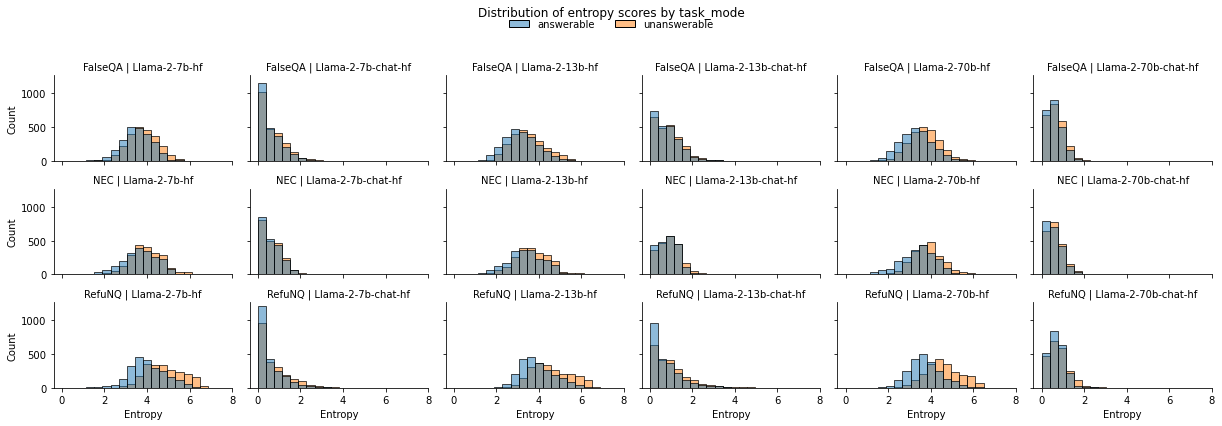

In [25]:
hue_mapping = {
    "answerable": sns.color_palette()[0],
    "unanswerable": sns.color_palette()[1]
}

# g = sns.displot(
#     data=df_llama_all,
#     x="entropy",
#     hue="task_mode",
#     hue_order=["answerable", "unanswerable"],
#     row="model_name",
#     row_order=LLAMA_MODELS,
#     col="task_name",
#     col_order=TASK_NAMES,
#     palette=hue_mapping,
#     bins=20,
#     height=2,
#     aspect=1.3,
#     legend=True,
# )
# g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
# g.fig.suptitle("Distribution of entropy scores by task_mode")
# g.set_axis_labels("Entropy", "Count")
# sns.move_legend(g, "upper center", bbox_to_anchor=(.50, 0.96), ncol=2, frameon=False, title=None, borderaxespad=0.)
# g.fig.tight_layout()
# g.fig.subplots_adjust(top=0.92)  # Adjust the top subplots spacing for the title

# # save figure as pdf
# g.savefig(path_to_save_figures + "entropy_distribution_by_task_mode.pdf", dpi=300)


# make the same plot but switch the layout of the rows and columns
g = sns.displot(
    data=df_llama_all,
    x="entropy",
    hue="task_mode",
    hue_order=["answerable", "unanswerable"],
    col="model_name",
    col_order=LLAMA_MODELS,
    row="task_name",
    row_order=TASK_NAMES,
    palette=hue_mapping,
    bins=20,
    height=2,
    aspect=1.3,
    legend=True,
)

g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.fig.suptitle("Distribution of entropy scores by task_mode")
g.set_axis_labels("Entropy", "Count")
sns.move_legend(g, "upper center", bbox_to_anchor=(.50, 0.96), ncol=2, frameon=False, title=None, borderaxespad=0.)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.82)  # Adjust the top subplots spacing for the title

g.savefig(path_to_save_figures + "Llama_2_entropy_distribution_by_task_mode.pdf", dpi=300)

## Perplexity

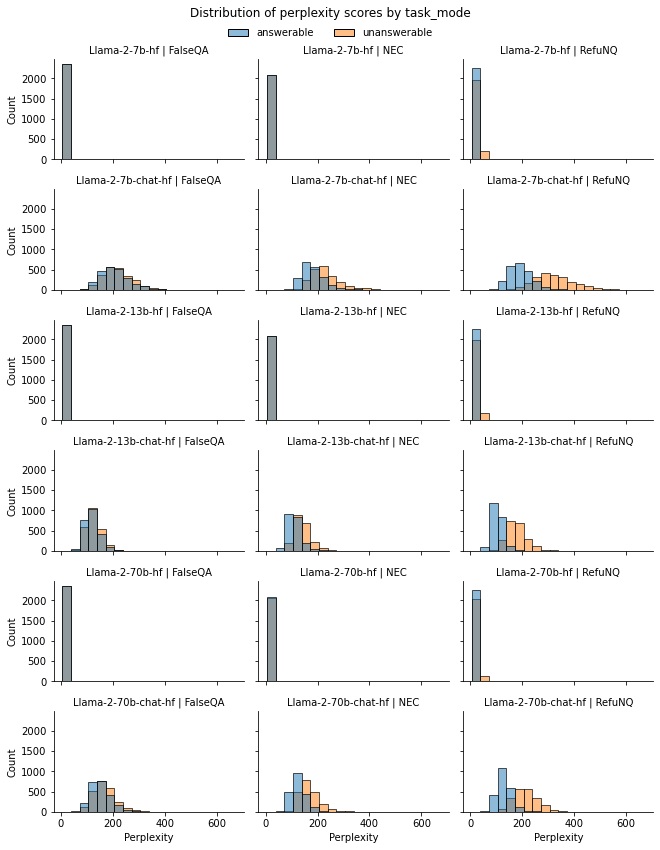

In [16]:
hue_mapping = {
    "answerable": sns.color_palette()[0],
    "unanswerable": sns.color_palette()[1]
}

LLAMA_MODELS_2 = [
 'Llama-2-7b-hf',
 'Llama-2-7b-chat-hf',
 'Llama-2-13b-hf',
 'Llama-2-13b-chat-hf',
 'Llama-2-70b-hf',
 'Llama-2-70b-chat-hf'
]

g = sns.displot(
    data=df_llama_all,
    x="perplexity",
    hue="task_mode",
    hue_order=["answerable", "unanswerable"],
    row="model_name",
    row_order=LLAMA_MODELS_2,
    col="task_name",
    col_order=TASK_NAMES,
    palette=hue_mapping,
    bins=20,
    height=2,
    aspect=1.3,
    legend=True,
)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.fig.suptitle("Distribution of perplexity scores by task_mode")
g.set_axis_labels("Perplexity", "Count")
sns.move_legend(g, "upper center", bbox_to_anchor=(.50, 0.96), ncol=2, frameon=False, title=None, borderaxespad=0.)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.92)  # Adjust the top subplots spacing for the title

# skip the first, third, fifth row



## Uncertainty (Closed-source)

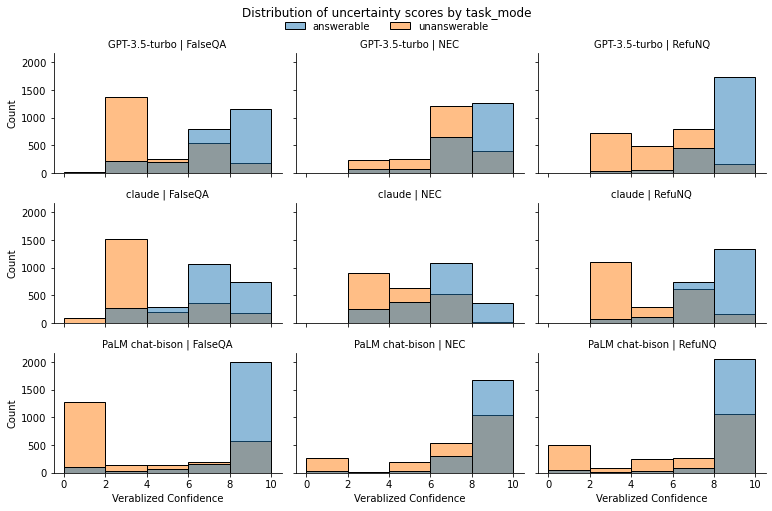

In [11]:
hue_mapping = {
    "answerable": sns.color_palette()[0],
    "unanswerable": sns.color_palette()[1]
}

g = sns.displot(
    # data=df_close_source_all.groupby(["model_name", "task_name", "task_mode", "uncertainty"]).count()["question"].reset_index().rename(columns={"question": "count"}),
    data=df_close_source_all,
    x="uncertainty",
    # y="question",
    # y="count",
    hue="task_mode",
    hue_order=["answerable", "unanswerable"],
    row="model_name",
    col="task_name",
    col_order=TASK_NAMES,
    palette=hue_mapping,
    height=2.4,
    aspect=1.3,
    bins=5,
)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.fig.suptitle("Distribution of uncertainty scores by task_mode")
g.set_axis_labels("Verablized Confidence", "Count")
sns.move_legend(g, "upper center", bbox_to_anchor=(.50, 0.96), ncol=2, frameon=False, title=None, borderaxespad=0.)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.89)  # Adjust the top subplots spacing for the title

# save figure as pdf
# g.savefig(path_to_save_figures + "unified_proprietary_uncertainty_distribution_by_task_mode.pdf", dpi=300)


# Uncertainty (open-source)

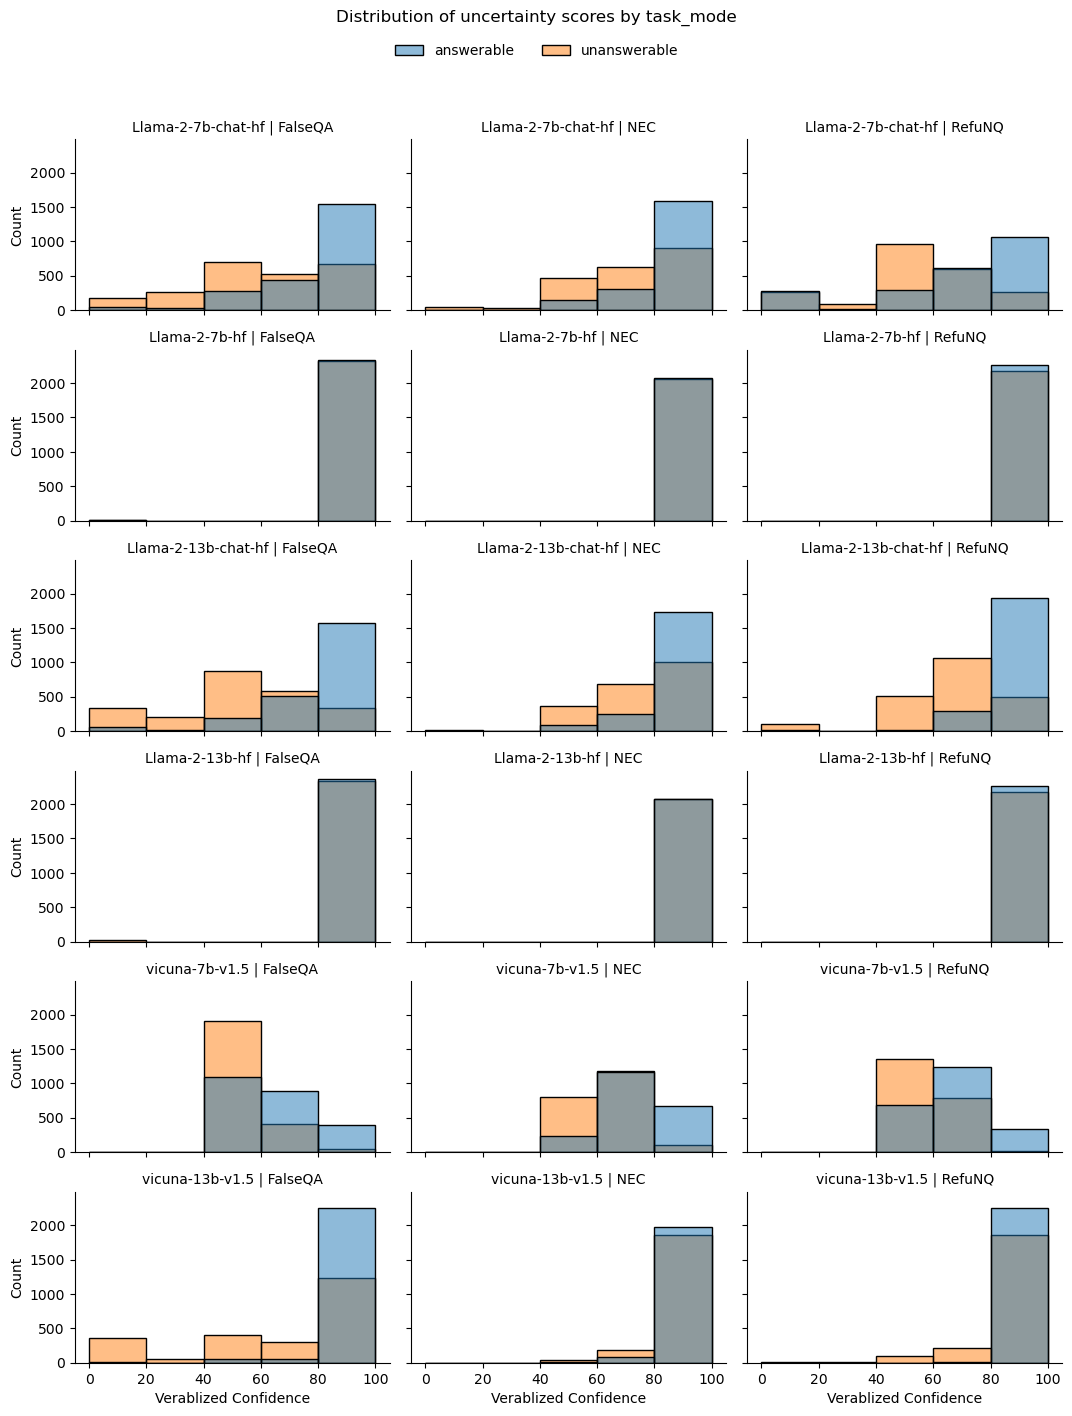

In [13]:
hue_mapping = {
    "answerable": sns.color_palette()[0],
    "unanswerable": sns.color_palette()[1]
}

g = sns.displot(
    # data=df_close_source_all.groupby(["model_name", "task_name", "task_mode", "uncertainty"]).count()["question"].reset_index().rename(columns={"question": "count"}),
    data=df_open_source_all,
    x="uncertainty",
    # y="question",
    # y="count",
    hue="task_mode",
    hue_order=["answerable", "unanswerable"],
    row="model_name",
    col="task_name",
    col_order=TASK_NAMES,
    palette=hue_mapping,
    height=2.4,
    aspect=1.3,
    bins=5,
)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.fig.suptitle("Distribution of uncertainty scores by task_mode")
g.set_axis_labels("Verablized Confidence", "Count")
sns.move_legend(g, "upper center", bbox_to_anchor=(.50, 0.96), ncol=2, frameon=False, title=None, borderaxespad=0.)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.89)  # Adjust the top subplots spacing for the title

# save figure as pdf
g.savefig(path_to_save_figures + "unified_opensource_uncertainty_distribution_by_task_mode.pdf", dpi=300)

# Plot Refusal vs. Entropy

## Open-source: entropy

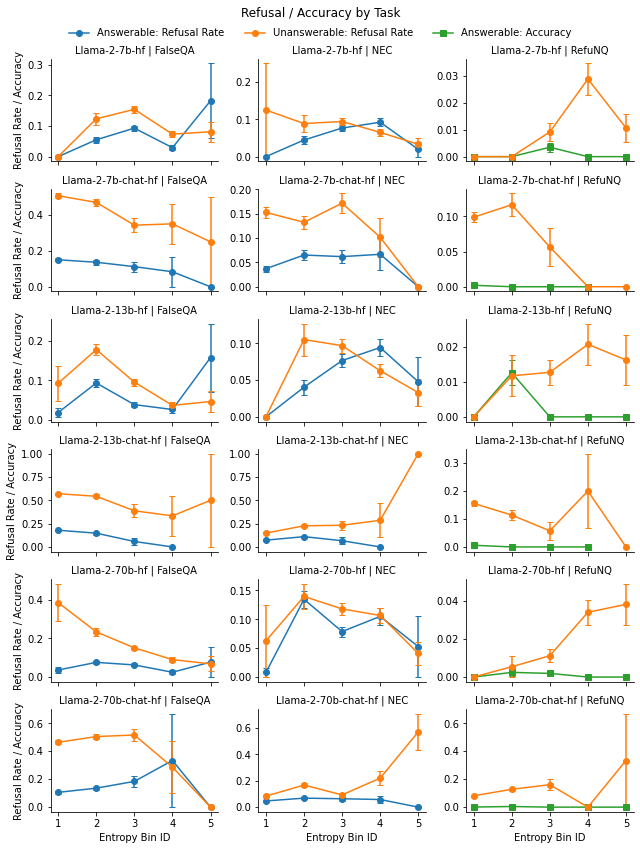

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

N_BINS = 5

COLOR_MAP = {
    "answerable": sns.color_palette()[0],
    "unanswerable": sns.color_palette()[1],
    "correctness": sns.color_palette()[2],
}

def process_and_plot(data, **kwargs):
    # Extract model_name and task_name from the data
    model_name = data['model_name'].iloc[0]
    task_name = data['task_name'].iloc[0]
    
    # Bin the entropy
    data = data.assign(entropy_bin=pd.cut(data["entropy"], bins=N_BINS, labels=False) + 1)  # +1 to start bin numbering from 1
    
    # Define a function to compute the standard error of the mean
    sem = lambda x: x.std() / np.sqrt(x.count())
    
    # Group by entropy_bin and compute metrics
    grouped = data.groupby(["entropy_bin", "task_mode"]).agg(
        refusal_rate=("refusal", "mean"),
        refusal_rate_err=("refusal", sem),
        success_rate=("correctness", "mean"),
        success_rate_err=("correctness", sem),
        count=("response", "count"),
    ).reset_index()
    # print(grouped)

    # Get the current axis
    ax = plt.gca()
    
    # Define task modes explicitly
    task_modes = ["answerable", "unanswerable"]

    
    # Create a mapping from entropy_bin to a continuous range of bin IDs
    bin_mapping = {bin_value: i for i, bin_value in enumerate(grouped['entropy_bin'].unique())}
    
    # Iterate over the defined task_mode values
    for task_mode in task_modes:
        subset = grouped[grouped['task_mode'] == task_mode]
        color = COLOR_MAP[task_mode]
        
        # Map the subset's entropy_bin values to the bin IDs
        x = subset['entropy_bin'].map(bin_mapping).values
        
        # Plot the refusal rate with error bars
        ax.errorbar(
            x, subset['refusal_rate'], yerr=subset['refusal_rate_err'],
            label=f'{task_mode} Refusal Rate', fmt='o-', color=color, capsize=3
        )

        # Plot the success rate with error bars (if applicable)
        if task_name == "RefuNQ" and task_mode == "answerable":
            # ONLY success rate is available for RefuNQ answerable
            ax.errorbar(
                x, subset['success_rate'], yerr=subset['success_rate_err'],
                label=f'{task_mode} Success Rate', fmt='s-', color=COLOR_MAP["correctness"], capsize=3
            )

    # Configure the plot
    ax.set_xticks(list(bin_mapping.values()))
    ax.set_xticklabels(list(bin_mapping.keys()))  # Display the actual entropy_bin values on the x-axis
    # ax.set_xlabel('Entropy Bin ID')
    # ax.set_ylabel('Rate')
    # ax.legend()
    

# Assuming df_llama_all is your DataFrame
g = sns.FacetGrid(
    df_llama_all, col="task_name", row="model_name", 
    height=2, aspect=1.5,
    sharey=False,
    col_order=TASK_NAMES,
    row_order=LLAMA_MODELS,
)

g.set_axis_labels("Entropy Bin ID", "Refusal Rate / Accuracy")
g.map_dataframe(process_and_plot)
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('Refusal / Accuracy by Task')

# Manually create the legend
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], color=COLOR_MAP["answerable"], marker='o', linestyle='-', label='Answerable: Refusal Rate'),
    Line2D([0], [0], color=COLOR_MAP["unanswerable"], marker='o', linestyle='-', label='Unanswerable: Refusal Rate'),
    Line2D([0], [0], color=COLOR_MAP["correctness"], marker='s', linestyle='-', label='Answerable: Accuracy'),
]

# Adding the legend to the last axis (bottom right)
g.fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.96), frameon=False, title=None, borderaxespad=0., ncol=3)
plt.show()

## Open source (perplexity)

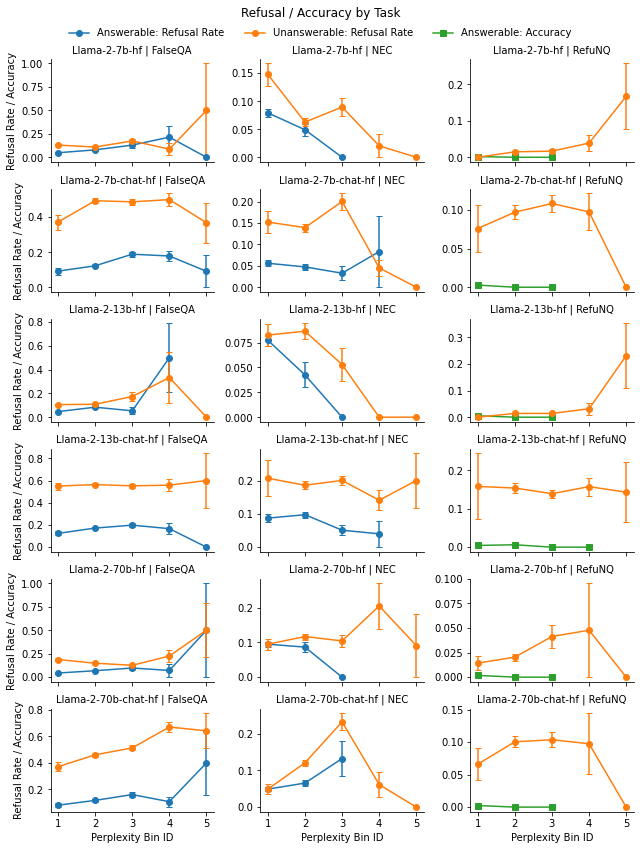

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

N_BINS = 5

COLOR_MAP = {
    "answerable": sns.color_palette()[0],
    "unanswerable": sns.color_palette()[1],
    "correctness": sns.color_palette()[2],
}

def process_and_plot(data, **kwargs):
    # Extract model_name and task_name from the data
    model_name = data['model_name'].iloc[0]
    task_name = data['task_name'].iloc[0]
    
    # Bin the perplexity
    data = data.assign(perplexity_bin=pd.cut(data["perplexity"], bins=N_BINS, labels=False) + 1)  # +1 to start bin numbering from 1
        
    # Define a function to compute the standard error of the mean
    sem = lambda x: x.std() / np.sqrt(x.count())
    
    # Group by perplexity_bin and compute metrics
    grouped = data.groupby(["perplexity_bin", "task_mode"]).agg(
        refusal_rate=("refusal", "mean"),
        refusal_rate_err=("refusal", sem),
        success_rate=("correctness", "mean"),
        success_rate_err=("correctness", sem),
        count=("response", "count"),
    ).reset_index()
    # print(grouped)

    # Get the current axis
    ax = plt.gca()
    
    # Define task modes explicitly
    task_modes = ["answerable", "unanswerable"]

    
    # Create a mapping from perplexity_bin to a continuous range of bin IDs
    bin_mapping = {bin_value: i for i, bin_value in enumerate(grouped['perplexity_bin'].unique())}
    
    # Iterate over the defined task_mode values
    for task_mode in task_modes:
        subset = grouped[grouped['task_mode'] == task_mode]
        color = COLOR_MAP[task_mode]
        
        # Map the subset's perplexity_bin values to the bin IDs
        x = subset['perplexity_bin'].map(bin_mapping).values
        
        # Plot the refusal rate with error bars
        ax.errorbar(
            x, subset['refusal_rate'], yerr=subset['refusal_rate_err'],
            label=f'{task_mode} Refusal Rate', fmt='o-', color=color, capsize=3
        )

        # Plot the success rate with error bars (if applicable)
        if task_name == "RefuNQ" and task_mode == "answerable":
            # ONLY success rate is available for RefuNQ answerable
            ax.errorbar(
                x, subset['success_rate'], yerr=subset['success_rate_err'],
                label=f'{task_mode} Success Rate', fmt='s-', color=COLOR_MAP["correctness"], capsize=3
            )

    # Configure the plot
    ax.set_xticks(list(bin_mapping.values()))
    ax.set_xticklabels(list(bin_mapping.keys()))  # Display the actual perplexity_bin values on the x-axis
    # ax.set_xlabel('Entropy Bin ID')
    # ax.set_ylabel('Rate')
    # ax.legend()
    

# Assuming df_llama_all is your DataFrame
g = sns.FacetGrid(
    df_llama_all, col="task_name", row="model_name", 
    height=2, aspect=1.5,
    sharey=False,
    col_order=TASK_NAMES,
    row_order=LLAMA_MODELS,
)

g.set_axis_labels("Perplexity Bin ID", "Refusal Rate / Accuracy")
g.map_dataframe(process_and_plot)
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('Refusal / Accuracy by Task')

# Manually create the legend
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], color=COLOR_MAP["answerable"], marker='o', linestyle='-', label='Answerable: Refusal Rate'),
    Line2D([0], [0], color=COLOR_MAP["unanswerable"], marker='o', linestyle='-', label='Unanswerable: Refusal Rate'),
    Line2D([0], [0], color=COLOR_MAP["correctness"], marker='s', linestyle='-', label='Answerable: Accuracy'),
]

# Adding the legend to the last axis (bottom right)
g.fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.96), frameon=False, title=None, borderaxespad=0., ncol=3)
plt.show()

## Closed-Source: confidence vs accuracy / refusal

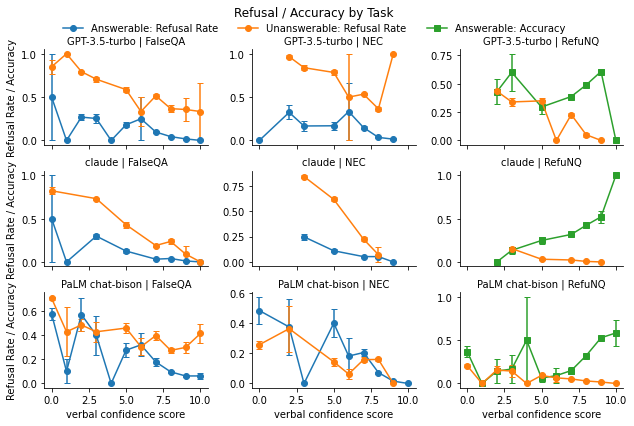

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

N_BINS = 5

COLOR_MAP = {
    "answerable": sns.color_palette()[0],
    "unanswerable": sns.color_palette()[1],
    "correctness": sns.color_palette()[2],
}

def process_and_plot(data, **kwargs):
    # Extract model_name and task_name from the data
    model_name = data['model_name'].iloc[0]
    model_name = ["GPT-3.5-turbo", "Claude", "PaLM chat-bison-001"]
    task_name = data['task_name'].iloc[0]
    
    # Define a function to compute the standard error of the mean
    sem = lambda x: x.std() / np.sqrt(x.count())
    # Group by entropy_bin and compute metrics
    grouped = data.groupby(["uncertainty", "task_mode"]).agg(
        refusal_rate=("refusal", "mean"),
        refusal_rate_err=("refusal", sem),
        success_rate=("correctness", "mean"),
        success_rate_err=("correctness", sem),
        count=("response", "count"),
    ).reset_index()

    # Get the current axis
    ax = plt.gca()
    
    # Define task modes explicitly
    task_modes = ["answerable", "unanswerable"]

    
    # Iterate over the defined task_mode values
    for task_mode in task_modes:
        subset = grouped[grouped['task_mode'] == task_mode]
        color = COLOR_MAP[task_mode]
        
        # Map the subset's entropy_bin values to the bin IDs
        x = subset['uncertainty'].values
        
        # # plot scatter plot
        # ax.scatter(
        #     x, subset['refusal_rate'],
        #     label=f'{task_mode} Refusal Rate', color=color, marker='o'
        # )
        
        # Plot the refusal rate with error bars
        ax.errorbar(
            x, subset['refusal_rate'], yerr=subset['refusal_rate_err'],
            label=f'{task_mode} Refusal Rate', fmt='o-', color=color, capsize=3
        )

        # Plot the success rate with error bars (if applicable)
        if task_name == "RefuNQ" and task_mode == "answerable":
            # ONLY success rate is available for RefuNQ answerable
            ax.errorbar(
                x, subset['success_rate'], yerr=subset['success_rate_err'],
                label=f'{task_mode} Success Rate', fmt='s-', color=COLOR_MAP["correctness"], capsize=3
            )
            
            # # plot scatter plot
            # ax.scatter(
            #     x, subset['success_rate'],
            #     label=f'{task_mode} Success Rate', color=COLOR_MAP["correctness"], marker='s'
            # )
    

# Assuming df_close_source_all is your DataFrame
g = sns.FacetGrid(
    df_close_source_all, col="task_name", row="model_name", 
    height=2, aspect=1.5,
    sharey=False,
    col_order=TASK_NAMES,
)

g.set_axis_labels("verbal confidence score", "Refusal Rate / Accuracy")
g.map_dataframe(process_and_plot)
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.fig.subplots_adjust(top=0.88)
g.fig.suptitle('Refusal / Accuracy by Task')

# Manually create the legend
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], color=COLOR_MAP["answerable"], marker='o', linestyle='-', label='Answerable: Refusal Rate'),
    Line2D([0], [0], color=COLOR_MAP["unanswerable"], marker='o', linestyle='-', label='Unanswerable: Refusal Rate'),
    Line2D([0], [0], color=COLOR_MAP["correctness"], marker='s', linestyle='-', label='Answerable: Accuracy'),
]

# Adding the legend to the last axis (bottom right)
g.fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.95), frameon=False, title=None, borderaxespad=0., ncol=3)
plt.show()

# save figure as pdf
# g.savefig(path_to_save_figures + "unified_proprietary_refusal_accuracy_by_task.pdf", dpi=300)

## Open-Source: confidence vs accuracy / refusal

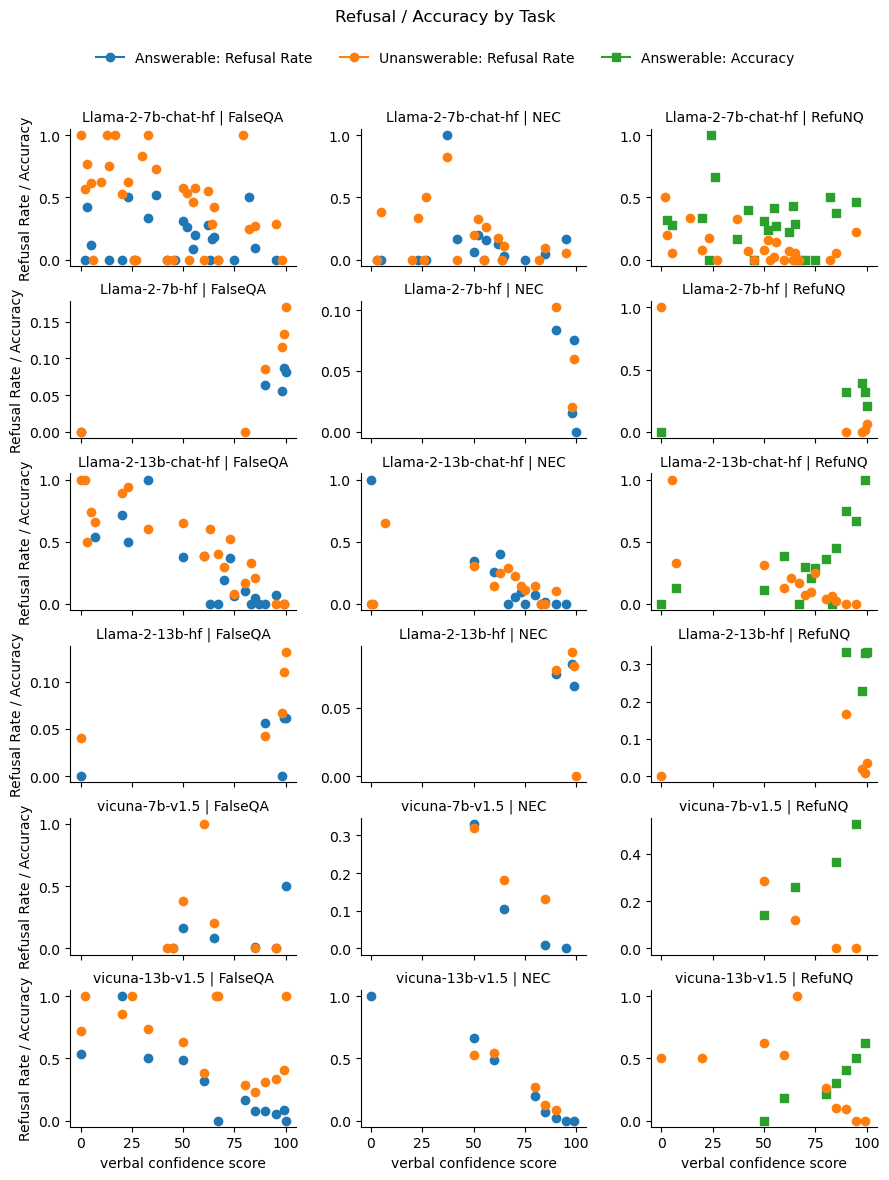

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

N_BINS = 5

COLOR_MAP = {
    "answerable": sns.color_palette()[0],
    "unanswerable": sns.color_palette()[1],
    "correctness": sns.color_palette()[2],
}

def process_and_plot(data, **kwargs):
    # Extract model_name and task_name from the data
    # model_name = data['model_name'].iloc[0]
    # model_name = ["GPT-3.5-turbo", "Claude", "PaLM chat-bison-001"]
    task_name = data['task_name'].iloc[0]
    
    # Define a function to compute the standard error of the mean
    sem = lambda x: x.std() / np.sqrt(x.count())
    # Group by entropy_bin and compute metrics
    grouped = data.groupby(["uncertainty", "task_mode"]).agg(
        refusal_rate=("refusal", "mean"),
        refusal_rate_err=("refusal", sem),
        success_rate=("correctness", "mean"),
        success_rate_err=("correctness", sem),
        count=("response", "count"),
    ).reset_index()

    # Get the current axis
    ax = plt.gca()
    
    # Define task modes explicitly
    task_modes = ["answerable", "unanswerable"]

    
    # Iterate over the defined task_mode values
    for task_mode in task_modes:
        subset = grouped[grouped['task_mode'] == task_mode]
        color = COLOR_MAP[task_mode]
        
        # Map the subset's entropy_bin values to the bin IDs
        x = subset['uncertainty'].values
        
        # plot scatter plot
        ax.scatter(
            x, subset['refusal_rate'],
            label=f'{task_mode} Refusal Rate', color=color, marker='o'
        )
        
        # # Plot the refusal rate with error bars
        # ax.errorbar(
        #     x, subset['refusal_rate'], yerr=subset['refusal_rate_err'],
        #     label=f'{task_mode} Refusal Rate', fmt='o-', color=color, capsize=3
        # )

        # Plot the success rate with error bars (if applicable)
        if task_name == "RefuNQ" and task_mode == "answerable":
            # # ONLY success rate is available for RefuNQ answerable
            # ax.errorbar(
            #     x, subset['success_rate'], yerr=subset['success_rate_err'],
            #     label=f'{task_mode} Success Rate', fmt='s-', color=COLOR_MAP["correctness"], capsize=3
            # )
            
            # plot scatter plot
            ax.scatter(
                x, subset['success_rate'],
                label=f'{task_mode} Success Rate', color=COLOR_MAP["correctness"], marker='s'
            )
    

# Assuming df_close_source_all is your DataFrame
g = sns.FacetGrid(
    df_open_source_all, col="task_name", row="model_name", 
    height=2, aspect=1.5,
    sharey=False,
    col_order=TASK_NAMES,
)

g.set_axis_labels("verbal confidence score", "Refusal Rate / Accuracy")
g.map_dataframe(process_and_plot)
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.fig.subplots_adjust(top=0.88)
g.fig.suptitle('Refusal / Accuracy by Task')

# Manually create the legend
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], color=COLOR_MAP["answerable"], marker='o', linestyle='-', label='Answerable: Refusal Rate'),
    Line2D([0], [0], color=COLOR_MAP["unanswerable"], marker='o', linestyle='-', label='Unanswerable: Refusal Rate'),
    Line2D([0], [0], color=COLOR_MAP["correctness"], marker='s', linestyle='-', label='Answerable: Accuracy'),
]

# Adding the legend to the last axis (bottom right)
g.fig.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 0.95), frameon=False, title=None, borderaxespad=0., ncol=3)
plt.show()

# save figure as pdf
g.savefig(path_to_save_figures + "unified_opensource_refusal_accuracy_by_task.pdf", dpi=300)